# EECS 545:  Python Basics

**Presented by:** Benjamin Bray

*January 27, 2016*

## Importing Scientific Libraries

In [61]:
# enable inline plots in a notebook
%matplotlib inline
# import the pyplot interface to matplotlib
from matplotlib import pyplot as plt;
# import numpy, and rename it
import numpy as np;
# Import sympy, and rename it
import sympy as sym;
# import scipy
import scipy as scp;
# need to import subpackages separately
import scipy.stats;

In [63]:
from numpy import *;

In [64]:
arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# `numpy`:  Arrays

Numpy's basic data type is the `ndarray`.
- "n-dimensional array"
- homogoneous collection
    - all elements have same *data type*
    - all elements have same *size*

## `numpy`:  Manual Arrays

You can populate an array manually, just as you would with Matlab:

In [40]:
A = np.array([ [1.0,2,3], [4,5,6], [7,8,9]])
print(A)

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]]


When you do this, `numpy` infers the correct data type:

In [41]:
A.dtype

dtype('float64')

## `numpy`:  Data Types

You can also specify the data type yourself:

In [11]:
A = np.array([ [1,2,3], [4,5,6], [7,8,9]], dtype=np.float)
print(A);
print(A.dtype);

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]]
float64


## `numpy`:  Ranges

`np.arange(start, stop, step)`

In [43]:
np.linspace(1, 10, 100)

array([  1.        ,   1.09090909,   1.18181818,   1.27272727,
         1.36363636,   1.45454545,   1.54545455,   1.63636364,
         1.72727273,   1.81818182,   1.90909091,   2.        ,
         2.09090909,   2.18181818,   2.27272727,   2.36363636,
         2.45454545,   2.54545455,   2.63636364,   2.72727273,
         2.81818182,   2.90909091,   3.        ,   3.09090909,
         3.18181818,   3.27272727,   3.36363636,   3.45454545,
         3.54545455,   3.63636364,   3.72727273,   3.81818182,
         3.90909091,   4.        ,   4.09090909,   4.18181818,
         4.27272727,   4.36363636,   4.45454545,   4.54545455,
         4.63636364,   4.72727273,   4.81818182,   4.90909091,
         5.        ,   5.09090909,   5.18181818,   5.27272727,
         5.36363636,   5.45454545,   5.54545455,   5.63636364,
         5.72727273,   5.81818182,   5.90909091,   6.        ,
         6.09090909,   6.18181818,   6.27272727,   6.36363636,
         6.45454545,   6.54545455,   6.63636364,   6.72

In [13]:
np.linspace(0,1,6)

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

## `numpy`: Reshape

In [44]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [45]:
np.reshape(np.arange(1,10), (3,3))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

## `numpy`:  Built-In Matrices

In [60]:
np.ones((3,3))*5 / np.ones((3,3)) * 2

array([[ 10.,  10.,  10.],
       [ 10.,  10.,  10.],
       [ 10.,  10.,  10.]])

In [65]:
np.ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

## Diagonal Matrices

In [74]:
d = np.array([1,2,3,4,5]);
m = d.shape[0];
n = 8;


# vector to matrix
dd = np.zeros(n)
dd[:m] = d;
np.diag(dd)

# start with matrix
D = np.zeros((n,n))
D[:m,:m] = np.diag(d);
D

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

## Motivating Problem:  Gradient Descent

To find the minimum of some well-behaved function $f(x)$,

<div style="padding:10px; margin: 10px 0; border: 1px solid black">
1. Initial guess $x_0$. <br>
2. **Repeat:**  $x_{k+1} \equiv x_k - \alpha \nabla f(x_k)$
</div>

- Follow the negative gradient, pointing in the direction of greatest *decrease*.
- Step size $\alpha$ determines how quickly we descend

# Random Quadratic Form

Recall that a **quadratic form** is a function $f(x) = \frac{1}{2} x^T A x$ where $A$ is symmetric.

$$
f(x) = \sum_{i=1}^n \sum_{k=1}^n x_i A_{ij} x_j
$$

### Properties
- The function $f$ is **convex** if $A$ is positive-definite.
    - Equivalently, if $A$ has all positive eigenvalues.
    - In this case, $f$ is a **paraboloid** or a convex "bowl" in $\mathbb{R}^n$
- The gradient is $\nabla_x f = Ax$.

### Can we sample a quadratic form at random?

**Idea:**  Symmetric $A$ has eigendecomposition $A = Q^T \Lambda Q$, where
    
- $Q$ is orthogonal, representing a change of basis
- $\Lambda$ is diagonal, containing the eigenvalues of $A$

**Algorithm:** To sample a random positive-definite matrix $A$, 
1. Sample a random orthgonal matrix $Q$
2. Pick random positive eigenvalues $\Lambda$
3. Compute $A = Q^T \Lambda Q$

**Useful Functions:** We will use the following to write our code:
- `np.linalg.qr(matrix)`
- `np.diag(vector)`
- `np.random.exponential(scale > 0, output_shape)`

**Recall:**  The exponential distribution on $x \in [0,+\infty)$,
    $$
    f(x; \lambda) = \lambda e^{-\lambda x}
    $$

In [103]:
n = 4
np.random.randn(n,n)

array([[-0.56070416,  0.48189957, -1.11403678, -0.18587181],
       [-0.27399061, -0.23890092, -0.27170664, -1.36529266],
       [ 0.98965628, -1.23255998, -2.1974949 , -0.64142549],
       [ 0.84334964,  1.01163091,  1.10005949, -1.37601005]])

In [105]:
def random_orthogonal(n):
    A = np.random.randn(n,n);
    Q,R = np.linalg.qr(A);
    return Q;

In [111]:
Q = random_orthogonal(3)

np.linalg.norm(np.dot(Q.T, Q) - np.eye(3))

1.1102230246251565e-16

In [118]:
def random_pd(n):
    # 1.  Random orthogonal matrix
    Q = random_orthogonal(n);
    # 2.  Random positive eigenvalues
    eigs = np.random.exponential(size=n);
    L = np.diag(eigs);
    # 3.  A = Q^T L Q
    return np.dot(Q.T, np.dot(L, Q));

In [121]:
A = random_pd(4)
print(A)

[[  9.73372112e-01   1.73985176e-01  -5.78646639e-02  -2.89826013e-01]
 [  1.73985176e-01   9.34122988e-01   1.27680806e-01  -8.71919432e-04]
 [ -5.78646639e-02   1.27680806e-01   9.10744794e-01   1.34240100e-02]
 [ -2.89826013e-01  -8.71919432e-04   1.34240100e-02   4.10678322e-01]]


In [136]:
# 1.  Random orthogonal matrix
Q = random_orthogonal(n);
# 2.  Random positive eigenvalues
eigs = np.random.exponential(size=n);
L = np.diag(eigs);
# 3.  A = Q^T L Q
A = np.dot(Q.T, np.dot(L, Q));

_, v = np.linalg.eig(A)

## Basic Plotting

- Plotting Lines
- Plotting Multiple Lines
- Scatter Plots
- Legend, Titles, etc.

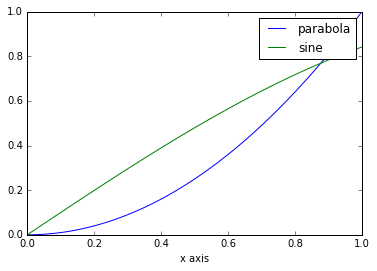

In [99]:
x = np.linspace(0,1,100);
y1 = x ** 2;
y2 = np.sin(x);

plt.plot(x, y1, label="parabola");
plt.plot(x, y2, label="sine");
plt.legend();
plt.xlabel("x axis");

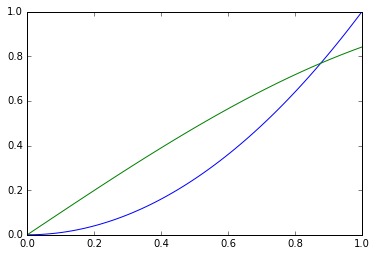

In [98]:
plt.plot(x, y1, x, y2)

## 3d plotting

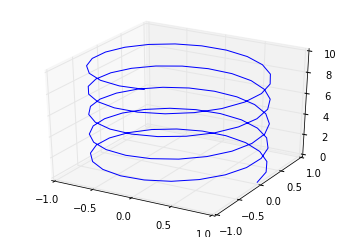

In [138]:
# import 3d stuff
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# create figure; enable 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot parametric curve
t = np.linspace(0, 10, 100);
x = np.cos(t * 3);
y = np.sin(t * 3);

ax.plot(x,y,t)

### Plotting Surfaces

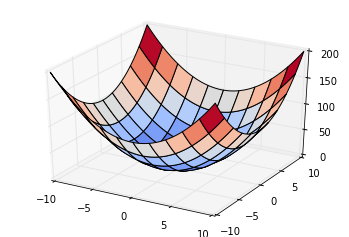

In [147]:
# need to define a grid on the xy plane
xvals = np.linspace(-10,10, 100);
yvals = np.linspace(-10,10, 100);

X,Y = np.meshgrid(xvals, yvals);
Z = X**2 + Y**2;

# enable 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap="coolwarm");

In [148]:
xvals = np.arange(1,4);
yvals = np.arange(1,4);

In [150]:
xvals

array([1, 2, 3])

In [155]:
X,Y = np.meshgrid(xvals, yvals)
print(X);
print(Y);

Z = X**2 + Y**2
Z

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[1 1 1]
 [2 2 2]
 [3 3 3]]


array([[ 2,  5, 10],
       [ 5,  8, 13],
       [10, 13, 18]])

In [156]:
np.dot(X,X)

array([[ 6, 12, 18],
       [ 6, 12, 18],
       [ 6, 12, 18]])